# 1 Downloading datasets and visualizing

In [1]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "news_dataset.json"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "haitranquangofficial/vietnamese-online-news-dataset",
  file_path,
)

print("First 5 records:", df.head(10))

C:\Users\PC\AppData\Local\Temp\ipykernel_4420\652278202.py:8: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:        id             author  \
0  218270                      
1  218269      (Nguồn: Sina)   
2  218268          Hồ Sỹ Anh   
3  218267           Ngọc Ánh   
4  218266  HẢI YẾN - MINH LÝ   
5  218265                      
6  218264                      
7  218263   Hoàng Yến/VOV.VN   
8  218262                T.G   
9  218261           Đỗ Trung   

                                             content  picture_count  \
0  Chiều 31/7, Công an tỉnh Thừa Thiên - Huế đã c...              3   
1  Gần đây, Thứ trưởng Bộ Phát triển Kỹ thuật số,...              1   
2  Kết quả thi tốt nghiệp THPT năm 2022 cho thấy ...              3   
3  Thống đốc Kentucky Andy Beshear hôm 31/7 cho h...              1   
4  Vụ tai nạn giao thông liên hoàn trên phố đi bộ...             12   
5  Chia sẻ trên Twitter, thị trưởng Hanover Belit...              2   
6  "Em vỡ òa trong hạnh phúc khi được xướng tên ở...              8   
7                                                             

In [3]:
# Check info and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184539 entries, 0 to 184538
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             184539 non-null  int64         
 1   author         184539 non-null  object        
 2   content        184539 non-null  object        
 3   picture_count  184539 non-null  int64         
 4   processed      184539 non-null  int64         
 5   source         184534 non-null  object        
 6   title          184539 non-null  object        
 7   topic          184539 non-null  object        
 8   url            184539 non-null  object        
 9   crawled_at     184125 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 14.1+ MB


In [4]:
# Check missing values in each column
print(df.isnull().sum())

id                 0
author             0
content            0
picture_count      0
processed          0
source             5
title              0
topic              0
url                0
crawled_at       414
dtype: int64


In [5]:
text_cols = [c for c in ["author", "content", "picture_count", "processed", "source", "topic", "url"] if c in df.columns]
df["text"] = df[text_cols].astype(str).agg(" ".join, axis=1)

df.head()

,id,author,content,picture_count,processed,source,title,topic,url,crawled_at,text
0,218270,,"Chiều 31/7, Công an tỉnh Thừa Thiên - Huế đã c...",3,0,docbao.vn,"Tên cướp tiệm vàng tại Huế là đại uý công an, ...",Pháp luật,https://docbao.vn/phap-luat/ten-cuop-tiem-vang...,2022-08-01 09:09:22.817308,"Chiều 31/7, Công an tỉnh Thừa Thiên - Huế đã ..."
1,218269,(Nguồn: Sina),"Gần đây, Thứ trưởng Bộ Phát triển Kỹ thuật số,...",1,0,vtc.vn,"Bỏ qua mạng 5G, Nga tiến thẳng từ 4G lên 6G",Sống kết nối,https://vtc.vn/bo-qua-mang-5g-nga-tien-thang-t...,2022-08-01 09:09:21.181469,"(Nguồn: Sina) Gần đây, Thứ trưởng Bộ Phát triể..."
2,218268,Hồ Sỹ Anh,Kết quả thi tốt nghiệp THPT năm 2022 cho thấy ...,3,0,thanhnien.vn,Địa phương nào đứng đầu cả nước tổng điểm 3 mô...,Giáo dục,https://thanhnien.vn/dia-phuong-nao-dung-dau-c...,2022-08-01 09:09:15.311901,Hồ Sỹ Anh Kết quả thi tốt nghiệp THPT năm 2022...
3,218267,Ngọc Ánh,Thống đốc Kentucky Andy Beshear hôm 31/7 cho h...,1,0,vnexpress,Người chết trong mưa lũ 'nghìn năm có một' ở M...,Thế giới,https://vnexpress.net/nguoi-chet-trong-mua-lu-...,2022-08-01 09:09:02.211498,Ngọc Ánh Thống đốc Kentucky Andy Beshear hôm 3...
4,218266,HẢI YẾN - MINH LÝ,Vụ tai nạn giao thông liên hoàn trên phố đi bộ...,12,0,soha,"Hải Phòng: Hình ảnh xe ""điên"" gây tai nạn liên...",Thời sự - Xã hội,https://soha.vn/hai-phong-hinh-anh-xe-dien-gay...,2022-08-01 09:09:01.601170,HẢI YẾN - MINH LÝ Vụ tai nạn giao thông liên h...


In [6]:
df["text"][0]

" Chiều 31/7, Công an tỉnh Thừa Thiên - Huế đã có thông tin ban đầu về vụ nổ súng,cướp tiệm vàng tại chợ Đông Ba nằm trên đường Trần Hưng Đạo (TP Huế, tỉnh Thừa Thiên - Huế). Thông Sài Gòn Giải Phóng, khoảng 12h30' ngày 31/7, một đối tượng sử dụng súng AK bất ngờ xông vào tiệm vàng Hoàng Đức và Thái Lợi (phía trước chợ Đông Ba) rồi nổ súng chỉ thiên liên tiếp uy hiếp chủ tiệm để cướp vàng. Sau đó, đối tượng mang số vàng vừa cướp được vứt ra vỉa hè rồi đi bộ đến khu vực cầu Gia Hội, cách khu vực gây án khoảng 300m. Giám đốc Công an tỉnh Thừa Thiên – Huế lập tức trực tiếp chỉ đạo các lực lượng chức năng gồm Công an tỉnh và Công an TP Huế nhanh chóng có mặt tại hiện trường triển khai đồng bộ các biện pháp nghiệp vụ, khoanh vùng và ngăn không để người dân đi vào hiện trường. Hàng trăm tiểu thương trong chợ Đông Ba và người dân gần cầu Gia Hội được yêu cầu di chuyển khỏi hiện trường, đóng cửa nhà đề phòng đạn lạc. Tuy nhiên, thấy vàng bị ném ra đường, nhiều người đua nhau nhặt, tạo cảnh nhố

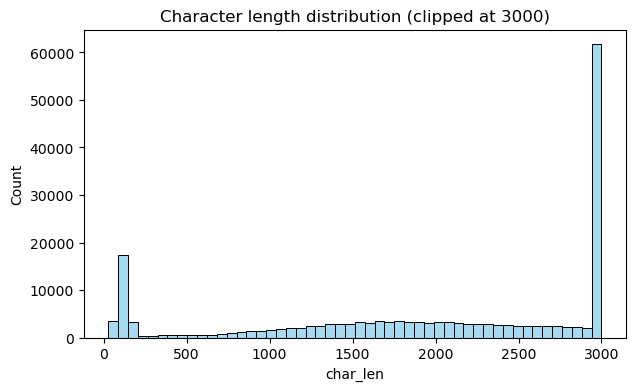

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

df["char_len"] = df["text"].astype(str).str.len()

plt.figure(figsize=(7,4))
sns.histplot(df["char_len"].clip(upper=3000), bins=50, color="skyblue")
plt.title("Character length distribution (clipped at 3000)")
plt.show()

## 2 Text Preprocessing

I will clean the text step by step as follows:
1. Remove HTML tags  
2. Remove HTML entities  
3. Convert encoding errors (Windows-1252 → UTF-8)  
4. Tokenization (Vietnamese word segmentation)
5. Remove common tokens (emails, URLs, phones, dates, numbers, mentions)  
6. Remove emojis / emoticons  
7. Remove unwanted characters (non-Latin, _, extra spaces)  
8. Normalize Vietnamese diacritics  
9. Strip whitespace  

In [8]:
!pip install regex
!pip install pyvi

In [9]:
import re, unicodedata
import regex
from pyvi import ViTokenizer, ViPosTagger

# Regex patterns
RE_EMAIL = re.compile(r"([\w0-9_\.-]+)(@)([\d\w\.-]+)(\.)([\w\.]{2,6})")
RE_URL = re.compile(r"https?:\/\/(?!.*:\/\/)\S+")
RE_PHONE = re.compile(r"(09|01[2|6|8|9])+([0-9]{8})\b")
RE_MENTION = re.compile(r"@.+?:")
RE_NUMBER = re.compile(r"\d+\.?\d*")
RE_DATETIME = '\d{1,2}\s?[/-]\s?\d{1,2}\s?[/-]\s?\d{4}'
RE_HTML_TAG = re.compile(r'<[^>]+>')
RE_CLEAR_1 = regex.compile(r"[^_<>\s\p{Latin}]")  # requires 'regex' library
RE_CLEAR_2 = re.compile(r"__+")
RE_CLEAR_3 = re.compile(r"\s+")

KEEP_DIACRITICS = True

<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
C:\Users\PC\AppData\Local\Temp\ipykernel_4420\3872219410.py:11: SyntaxWarning: invalid escape sequence '\d'
  RE_DATETIME = '\d{1,2}\s?[/-]\s?\d{1,2}\s?[/-]\s?\d{4}'


In [10]:
def replace_common_token(txt):
  txt = re.sub(RE_EMAIL, ' ', txt)
  txt = re.sub(RE_URL, ' ', txt)
  txt = re.sub(RE_MENTION, ' ', txt)
  txt = re.sub(RE_DATETIME, ' ', txt)
  txt = re.sub(RE_NUMBER, ' ', txt)
  return txt

In [11]:
def remove_emoji(txt):
    txt = re.sub(r':v', '', txt)
    txt = re.sub(r':D', '', txt)
    txt = re.sub(r':3', '', txt)
    txt = re.sub(r':\(', '', txt)
    txt = re.sub(r':\)', '', txt)
    txt = re.sub(r'=\)*', '', txt)
    return txt

In [12]:
def remove_html_tag(txt):
    return re.sub(RE_HTML_TAG, ' ', txt)

In [13]:
def loaddicchar():
    dic = {}
    char1252 = (
        'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|'
        'è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|'
        'ì|í|ỉ|ĩ|ị|'
        'ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|'
        'ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|'
        'ỳ|ý|ỷ|ỹ|ỵ|'
        'À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|'
        'È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|'
        'Ì|Í|Ỉ|Ĩ|Ị|'
        'Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|'
        'Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|'
        'Ỳ|Ý|Ỷ|Ỹ|Ỵ'
    ).split('|')

    charutf8 = (
        'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|'
        'è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|'
        'ì|í|ỉ|ĩ|ị|'
        'ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|'
        'ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|'
        'ỳ|ý|ỷ|ỹ|ỵ|'
        'À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|'
        'È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|'
        'Ì|Í|Ỉ|Ĩ|Ị|'
        'Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|'
        'Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|'
        'Ỳ|Ý|Ỷ|Ỹ|Ỵ'
    ).split('|')

    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic

dicchar = loaddicchar()

def convertwindown1525toutf8(txt):
    """
    Convert Vietnamese text from Windows-1252/VNI encoding errors
    to proper UTF-8 Unicode.
    """
    return re.sub(
        '|'.join(dicchar.keys()),  # regex khớp toàn bộ các ký tự lỗi
        lambda x: dicchar[x.group()],
        txt
    )

In [14]:
bang_nguyen_am = [['a', 'à', 'á', 'ả', 'ã', 'ạ', 'a'],
                  ['ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'aw'],
                  ['â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'aa'],
                  ['e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'e'],
                  ['ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'ee'],
                  ['i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'i'],
                  ['o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'o'],
                  ['ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'oo'],
                  ['ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'ow'],
                  ['u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'u'],
                  ['ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'uw'],
                  ['y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'y']]
bang_ky_tu_dau = ['', 'f', 's', 'r', 'x', 'j']

nguyen_am_to_ids = {}

for i in range(len(bang_nguyen_am)):
    for j in range(len(bang_nguyen_am[i]) - 1):
        nguyen_am_to_ids[bang_nguyen_am[i][j]] = (i, j)

In [15]:
def is_valid_vietnam_word(word):
    chars = list(word)
    nguyen_am_index = -1
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x != -1:
            if nguyen_am_index == -1:
                nguyen_am_index = index
            else:
                if index - nguyen_am_index != 1:
                    return False
                nguyen_am_index = index
    return True

In [16]:
def chuan_hoa_dau_tu_tieng_viet(word):
    """
    Normalize tone marks in a single Vietnamese word.
    Ensures tone marks are placed on the correct vowel
    according to Vietnamese orthography.
    Example: 'hoà' -> 'hoà', 'thỏai' -> 'thoải', 'úy' -> 'úy'
    """
    if not is_valid_vietnam_word(word):
        return word

    chars = list(word)
    dau_cau = 0              # tone mark type (sắc, huyền, hỏi, ngã, nặng)
    nguyen_am_index = []     # indexes of vowels in the word
    qu_or_gi = False         # special case flag for "qu" and "gi"

    # Scan each character
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1:
            continue

        # Special case "qu": treat 'u' after 'q' as a consonant
        if x == 9 and index > 0 and chars[index - 1] == 'q':
            chars[index] = 'u'
            qu_or_gi = True

        # Special case "gi": treat 'i' after 'g' as a consonant
        elif x == 5 and index > 0 and chars[index - 1] == 'g':
            chars[index] = 'i'
            qu_or_gi = True

        # If this vowel has a tone mark → record it
        if y != 0:
            dau_cau = y
            chars[index] = bang_nguyen_am[x][0]  # reset to base vowel

        # Record vowel index unless it's part of "qu"/"gi"
        if not qu_or_gi or index != 1:
            nguyen_am_index.append(index)

    # Case: no valid vowels
    if len(nguyen_am_index) < 2:
        if qu_or_gi:
            if len(chars) == 2:
                # "gi", "qu" cases with 2 letters
                x, y = nguyen_am_to_ids.get(chars[1])
                chars[1] = bang_nguyen_am[x][dau_cau]
            else:
                # longer word with "gi"/"qu"
                x, y = nguyen_am_to_ids.get(chars[2], (-1, -1))
                if x != -1:
                    chars[2] = bang_nguyen_am[x][dau_cau]
                else:
                    # fallback: put tone on i or u
                    chars[1] = bang_nguyen_am[5][dau_cau] if chars[1] == 'i' else bang_nguyen_am[9][dau_cau]
            return ''.join(chars)
        return word

    # Case: if the word contains ê or ơ → always put the tone there
    for index in nguyen_am_index:
        x, y = nguyen_am_to_ids[chars[index]]
        if x == 4 or x == 8:  # ê, ơ
            chars[index] = bang_nguyen_am[x][dau_cau]
            return ''.join(chars)

    # Case: word has 2 vowels
    if len(nguyen_am_index) == 2:
        if nguyen_am_index[-1] == len(chars) - 1:
            # If last vowel is at the end → tone goes to the first vowel
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            chars[nguyen_am_index[0]] = bang_nguyen_am[x][dau_cau]
        else:
            # Otherwise → tone goes to the second vowel
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]

    # Case: word has 3 vowels (e.g., "khuyên")
    else:
        # Place tone on the middle vowel
        x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
        chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]

    return ''.join(chars)

In [17]:
def chuan_hoa_dau_cau_tieng_viet(sentence):
    """
        Chuyển câu tiếng việt về chuẩn gõ dấu kiểu cũ.
        :param sentence:
        :return:
        """
    sentence = sentence.lower()
    words = sentence.split()
    for index, word in enumerate(words):
        words[index] = chuan_hoa_dau_tu_tieng_viet(word)
    return ' '.join(words)

In [18]:
def merge_proper_nouns(tokens, tags):
    """
    Merge consecutive Np tokens into a single proper noun.
    Example: ['Việt','Nam'] → ['Việt_Nam']
    """
    merged_tokens = []
    merged_tags = []
    temp = []
    for tok, tag in zip(tokens, tags):
        if tag == "Np":
            temp.append(tok)
        else:
            if temp:
                merged_tokens.append("_".join(temp))
                merged_tags.append("Np")
                temp = []
            merged_tokens.append(tok)
            merged_tags.append(tag)
    if temp:
        merged_tokens.append("_".join(temp))
        merged_tags.append("Np")
    return merged_tokens, merged_tags


def smart_lowercase_pyvi(txt: str) -> str:
    # POS tagging with PyVi
    tokens, pos_tags = ViPosTagger.postagging(txt)
    
    # Merge proper nouns
    tokens, pos_tags = merge_proper_nouns(tokens, pos_tags)

    new_tokens = []
    for tok, tag in zip(tokens, pos_tags):
        if tag == "Np":   # proper noun → keep original (capitalize first letter if needed)
            new_tokens.append(tok)
        else:             # normal word → lowercase
            new_tokens.append(tok.lower())

    return " ".join(new_tokens)

In [19]:
def preprocess(txt, tokenize=True):
    # 1. Remove HTML tags
    txt = remove_html_tag(txt)

    # 2. Remove HTML entities like &nbsp; &amp; ...
    txt = re.sub('&.{3,4};', ' ', txt)

    # 3. Convert Windows-1252/VNI encoding errors to UTF-8
    txt = convertwindown1525toutf8(txt)

    # 4. Tokenization (Vietnamese word segmentation)
    if tokenize:
        txt = ViTokenizer.tokenize(txt)

    # 5. Smart lowercase (POS tagging)
    txt = smart_lowercase_pyvi(txt) 
    
    # 6. Remove common tokens (emails, URLs, mentions, dates, numbers, phones)
    txt = replace_common_token(txt)

    # 7. Remove emojis and emoticons
    txt = remove_emoji(txt)

    # 8. Remove unwanted characters
    txt = RE_CLEAR_1.sub(" ", txt)  # non-Latin chars
    txt = RE_CLEAR_2.sub(" ", txt)  # collapse multiple underscores
    txt = RE_CLEAR_3.sub(" ", txt)  # collapse multiple spaces

    # 9. Normalize Vietnamese diacritics
    txt = chuan_hoa_dau_tu_tieng_viet(txt)

    # 10. Strip leading/trailing whitespace
    return txt.strip()

In [20]:
from tqdm import tqdm
tqdm.pandas()

df['preprocessed_text'] = df['text'].progress_apply(preprocess)

100%|██████████| 184539/184539 [35:33<00:00, 86.51it/s]  


In [27]:
import pandas as pd
from IPython.display import display

pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", 100)    


display(df[['text', 'preprocessed_text']].head(5))


text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Chiều 31/7, Công an tỉnh Thừa Thiên - Huế đã có thông tin ban đầu về vụ nổ súng,cướp tiệm vàng tại chợ Đông Ba nằm trên đường Trần Hưng Đạo (TP Huế, tỉnh Thừa Thiên - Huế). Thông Sài Gòn Giải Phóng, khoảng 12h30' ngày 31/7, một đối tượng sử dụng súng AK bất ngờ xông vào tiệm vàng Hoàng Đức và Thái Lợi (phía trước chợ Đông Ba) rồi nổ súng chỉ thiên liên tiếp uy hiếp chủ tiệm để cướp vàng. Sau đó, đối tượng mang số vàng vừa cướp được vứt ra vỉa hè rồi đi bộ đến khu vực cầu Gia Hội, cách khu vực gây án khoảng 300m. Giám đốc Công an tỉnh Thừa Thiên – Huế lập tức trực tiếp chỉ đạo các lực lượng chức năng gồm Công an tỉnh và Công an TP Huế nhanh chóng có mặt tại hiện trường triển khai đồng bộ các biện pháp nghiệp vụ, khoanh vùng và ngăn không để người dân đi vào hiện trường. Hàng trăm tiểu thương trong chợ Đông Ba và người dân gần cầu Gia Hội được yêu cầu di chuyển khỏi hiện trường, đóng cửa nhà đề phòng đạn lạc. Tuy nhiên, thấy vàng bị ném ra đường, nhiều người đua nhau nhặt, tạo cảnh nhốn nháo trước cổng chợ. Do đây là khu vực trung tâm TP Huế, đông dân nên để đảm bả

In [28]:
tokens = []
for sent in tqdm(df["preprocessed_text"], desc="Building tokens"):
    tokens.extend(sent.split())

Building tokens:   0%|          | 0/184539 [00:00<?, ?it/s]

Building tokens: 100%|██████████| 184539/184539 [00:04<00:00, 38960.50it/s]


# 3 Vietnames Vocabulary Building

In [29]:
from collections import Counter
vocab_counter = Counter(tokens)

In [30]:
!pip install wordcloud

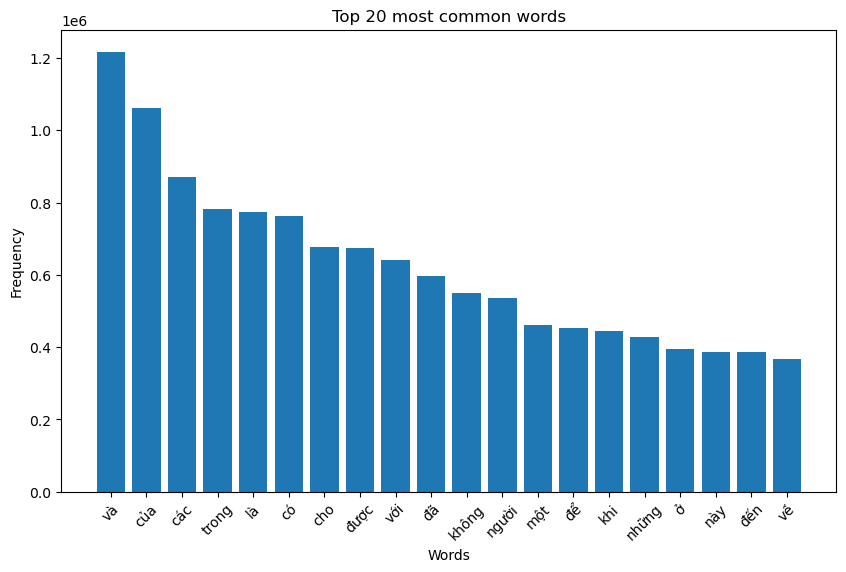

In [31]:
import matplotlib.pyplot as plt

# Lấy top 20 từ
most_common = vocab_counter.most_common(20)
words, freqs = zip(*most_common)

plt.figure(figsize=(10,6))
plt.bar(words, freqs)
plt.xticks(rotation=45)
plt.title("Top 20 most common words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

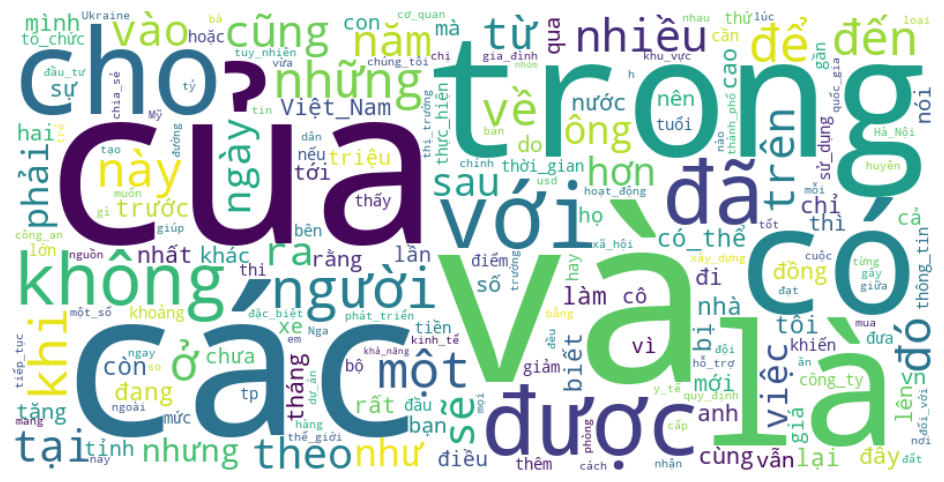

In [32]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    width=800, height=400,
    background_color="white").generate_from_frequencies(vocab_counter)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
